In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def erosion(image, structuring_element):
    eroded_image = []
    image //= 255
    offset = structuring_element.shape[1] // 2
    height, width = image.shape[0], image.shape[1]

    for r in range(height):
        nth_row = []
        for c in range(width):
            isFit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if((r + x)>=0 and (r+x)<height and (c+y)>=0 and (c+y)<width):
                        if((structuring_element[(x+offset), (y+offset)] == 1) and (image[(r+x), (c+y)] != structuring_element[(x+offset), (y+offset)])):
                        # if (np.all(structuring_element[(x+offset), (y+offset)] == 1) and np.any(image[(r+x), (c+y)] != structuring_element[(x+offset), (y+offset)])):
                            isFit = False
            pixel_value = 1 if isFit else 0
            nth_row.append(pixel_value)
        eroded_image.append(nth_row)
    image = image * 255
    eroded_image = np.uint8(eroded_image)
    return eroded_image * 255


In [3]:
structuring_element = np.ones((3, 3))
structuring_element = np.uint8(structuring_element)

In [4]:
def extract_boundary(image, structuring_element):
    image_copy = image.copy()
    eroded_image = erosion(image_copy, structuring_element)
    return image - eroded_image

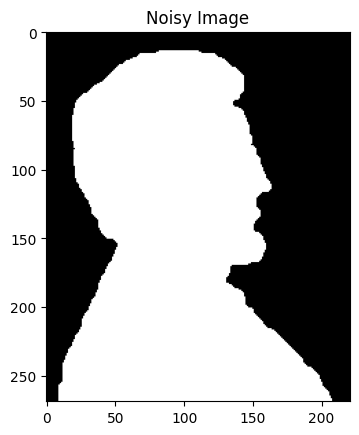

In [5]:
noisy_image = cv2.imread("../SrcImage/Fig0914(a) Lincoln From Penny 221x269.tif", 0) # Load Grayscale image
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.show()

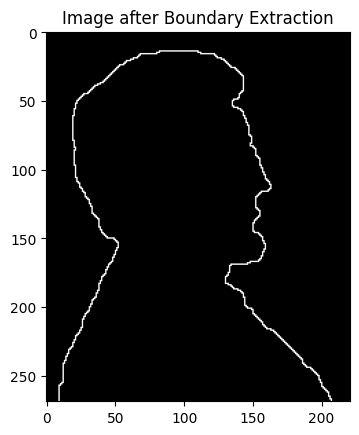

In [6]:
boundary_image = extract_boundary(noisy_image, structuring_element)
plt.imshow(cv2.cvtColor(boundary_image, cv2.COLOR_BGR2RGB))
plt.title("Image after Boundary Extraction")
plt.show()